# <center>MACHINE LEARNING ASSIGMENT </center>
##### <center>STUDENT NAME : ARUL RAYMONDS GEORGE JOSEPH</center>
##### <center>STUDENT ID: C00278718</center>

## Table of Contents:
1. [Introduction](#first-bullet)
2. [Businiess Understanding](#second-bullet)
3. [Data Understanding](#third-bullet)
4. [Data Preparation](#fourth-bullet)
5. [Modelling](#fifth-bullet)
6. [Evaluation](#sixth-bullet)
7. [Deployments](#seventh-bullet)
8. [Discussion](#eighth-bullet)
9. [Results](#nineth-bullet)
10. [References](#tenth-bullet)


## 1. Introduction <a class="anchor" id="first-bullet"></a>

World % of the protien intake comes from seafoods by fishing industry globally. Additionally, the demand for seafood is increasing due to economic availablity in developing nations and consumption of exotic fishes in developed countires are at rise. Also, fishing industry genrate employment for millons of people. So the pressure on fishing industry is increasing that leads to overfishing, poaching, human rights abuse and other illegal activites. Furthermore, overfishing greatly contributes to the reducing fish stocks of many fish species due its demand and rarity. So, many govermnets and non profit organisations like Global Fishing Watch (GFW) , google, skytruth and Spire are creating tools to actively monitor fishing activities that generates public awareness and helps policy makers to take actions against illegal activites. 
<br>
In this project we will try to understand and predict fishing vessels involed in fishing across globe by using ananymized open source data provided by GFW. The data

## 2. Business Understanding <a class="anchor" id="second-bullet"></a>

code blocks...

## 3. Data understanding <a class="anchor" id="third-bullet"></a>

code blocks...

## 4. Data Preparation <a class="anchor" id="fourth-bullet"></a>

code blocks...`

## 5. Modelling <a class="anchor" id="fifth-bullet"></a>

code blocks...

In [1]:

import tensorflow as tf
import pandas as pd
import numpy as np
import itertools


print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")


GPU is available


### Load Data from datapath

In [59]:
datapath = "data/0dab1200-c004-11ec-8a45-f167084fd93d/"
purse_seines = "purse_seines.csv"
unknown = "unknown.csv"
trollers = "trollers.csv"
trawlers = "trawlers.csv"
pole_and_line = "pole_and_line.csv"
fixed_gear = "fixed_gear.csv"
drifting_longlines = "drifting_longlines.csv"

pd.set_option('display.float_format', lambda x: '%0.4f' % x)
df = pd.read_csv(datapath+trawlers)
copy = df.copy()
# create new column for datetime for convinence
df["datetime"] = pd.to_datetime(df['timestamp'],unit='s')
df = df.drop_duplicates()
df.head()

mmsi       timestamp  distance_from_shore  distance_from_port  \
0 1252339803566.0000 1325376038.0000               0.0000              0.0000   
1 1252339803566.0000 1325377993.0000               0.0000              0.0000   
2 1252339803566.0000 1325378594.0000               0.0000              0.0000   
3 1252339803566.0000 1325379595.0000               0.0000              0.0000   
4 1252339803566.0000 1325380560.0000               0.0000              0.0000   

   speed   course     lat    lon  is_fishing source            datetime  
0 0.0000 153.0000 52.4586 4.5812     -1.0000    gfw 2012-01-01 00:00:38  
1 0.0000 153.0000 52.4587 4.5812     -1.0000    gfw 2012-01-01 00:33:13  
2 0.0000 153.0000 52.4586 4.5812     -1.0000    gfw 2012-01-01 00:43:14  
3 0.0000 153.0000 52.4586 4.5812     -1.0000    gfw 2012-01-01 00:59:55  
4 0.0000 153.0000 52.4586 4.5812     -1.0000    gfw 2012-01-01 01:16:00

### Analysing is_fishing atrribute
is_fishing = -1; not available <br>
is_fishing = 0; not fishing <br>
is_fishing > 0; possiblithy of fishing activity <br> <br>
Lets find out how many values of is_fihing is captured

In [60]:
df["is_fishing"].unique()

array([-1.        ,  0.        ,  1.        ,  0.6666667 ,  0.33333334,
        0.75      ,  0.25      ])

In [61]:
df[df["is_fishing"]>0].size

708345

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4369101 entries, 0 to 4369100
Data columns (total 11 columns):
 #   Column               Dtype         
---  ------               -----         
 0   mmsi                 float64       
 1   timestamp            float64       
 2   distance_from_shore  float64       
 3   distance_from_port   float64       
 4   speed                float64       
 5   course               float64       
 6   lat                  float64       
 7   lon                  float64       
 8   is_fishing           float64       
 9   source               object        
 10  datetime             datetime64[ns]
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 400.0+ MB


In [63]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

mmsi         timestamp distance_from_shore  \
count          4369101.00000     4369101.00000       4369101.00000   
mean   157895239544453.53125  1426219858.15639         78198.02489   
std     94947789560500.62500    38764722.50157        204074.69896   
min      1252339803566.00000  1325376038.00000             0.00000   
25%     77261928739173.00000  1397205111.00000             0.00000   
50%    175387414441613.00000  1434811196.00000          4242.53662   
75%    240226012373593.00000  1458922432.00000         55783.93359   
max    277515277585463.00000  1480031962.00000       3257453.25000   

      distance_from_port          speed         course            lat  \
count      4369101.00000  4369023.00000  4369023.00000  4369101.00000   
mean        149664.80424        2.97240      174.40434       32.66757   
std         327953.23712        4.10508      115.47010       38.37240   
min              0.00000        0.00000        0.00000      -84.98024   
25%           2236.01318        0.00000       64.80000       36.23107   
50%          36054.62500        1.50000      187.00000       52.09994   
75%          96080.93750        4.50000      276.00000       54.63578   
max       12452204.00000      102.30000      511.00000       84.61642   

                 lon     is_fishing  
count  4369101.00000  4369101.00000  
mean         4.92777       -0.94491  
std         81.27552        0.28445  
min       -179.99963       -1.00000  
25%         -8.28853       -1.00000  
50%          4.58442       -1.00000  
75%         14.32063       -1.00000  
max        179.99338        1.00000

In [64]:
df = df.dropna()
df = df[df["is_fishing"] != -1]
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df = df[df["mmsi"] != 186746307373264.0000]
#df.drop(['distance_from_shore','timestamp'], axis=1, inplace=True)
df.drop(['distance_from_shore'], axis=1, inplace=True)

In [65]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

mmsi         timestamp distance_from_port  \
count           175320.00000      175320.00000       175320.00000   
mean   192290061414991.65625  1421152246.62743       276584.63947   
std     87235131846054.20312    26898168.15682       479682.05267   
min      1252339803566.00000  1325409715.00000            0.00000   
25%    121426486551523.00000  1417704087.00000         2236.01318   
50%    222656062190286.00000  1425073310.00000        52998.69922   
75%    269050323939773.00000  1440481421.00000       250969.93750   
max    277515277585463.00000  1460697761.00000      3836963.25000   

              speed        course           lat           lon    is_fishing  \
count  175320.00000  175320.00000  175320.00000  175320.00000  175320.00000   
mean        2.93091     182.69206      44.76778      -2.79118       0.35105   
std         3.82241     114.51205      33.03098      42.58884       0.47472   
min         0.00000       0.00000     -50.19218    -179.69106       0.00000   
25%         0.00000      76.60000      43.61536      -8.69353       0.00000   
50%         1.20000     197.20000      54.63050       5.18031       0.00000   
75%         4.20000     280.79999      64.15637      16.54748       1.00000   
max       102.30000     360.00000      78.92516     179.69962       1.00000   

               year         month          hour           day  
count  175320.00000  175320.00000  175320.00000  175320.00000  
mean     2014.55112       6.31525      11.91319      15.81496  
std         0.83047       3.88738       6.76303       8.69971  
min      2012.00000       1.00000       0.00000       1.00000  
25%      2014.00000       2.00000       6.00000       8.00000  
50%      2015.00000       7.00000      12.00000      16.00000  
75%      2015.00000       9.00000      18.00000      23.00000  
max      2016.00000      12.00000      23.00000      31.00000

In [66]:
from collections import Counter
c = Counter(df["speed"])
count = c.most_common()
s = [x for x in count]
s.sort()


In [67]:
df.head()

mmsi       timestamp  distance_from_port  speed   course  \
60646 1252339803566.0000 1420088903.0000              0.0000 0.0000 128.0000   
60647 1252339803566.0000 1420089634.0000              0.0000 0.0000 128.0000   
60648 1252339803566.0000 1420090373.0000              0.0000 0.0000 128.0000   
60649 1252339803566.0000 1420091123.0000              0.0000 0.0000 128.0000   
60650 1252339803566.0000 1420091844.0000              0.0000 0.0000 128.0000   

          lat    lon  is_fishing source            datetime  year  month  \
60646 52.4587 4.5813      0.0000    gfw 2015-01-01 05:08:23  2015      1   
60647 52.4587 4.5813      0.0000    gfw 2015-01-01 05:20:34  2015      1   
60648 52.4587 4.5813      0.0000    gfw 2015-01-01 05:32:53  2015      1   
60649 52.4587 4.5812      0.0000    gfw 2015-01-01 05:45:23  2015      1   
60650 52.4587 4.5812      0.0000    gfw 2015-01-01 05:57:24  2015      1   

       hour  day  
60646     5    1  
60647     5    1  
60648     5    1  
60649     5    1  
60650     5    1

Find the fishing vessels by using is_fishing > 0 and find the number of enter for each vessel

In [78]:
fishing_vessels = df.copy()
#fishing_vessels = df[(df["is_fishing"]!=0)]
#fishing_vessels = df[(df["is_fishing"]!=1)]
fishing_vessels.to_csv(datapath+"doi.csv")
fishing_vessels.shape

(175320, 14)

In [69]:
pd.set_option("max_rows", None)
fishing_location = fishing_vessels.sort_values(by=["datetime"])
#pd.reset_option(“max_rows”)

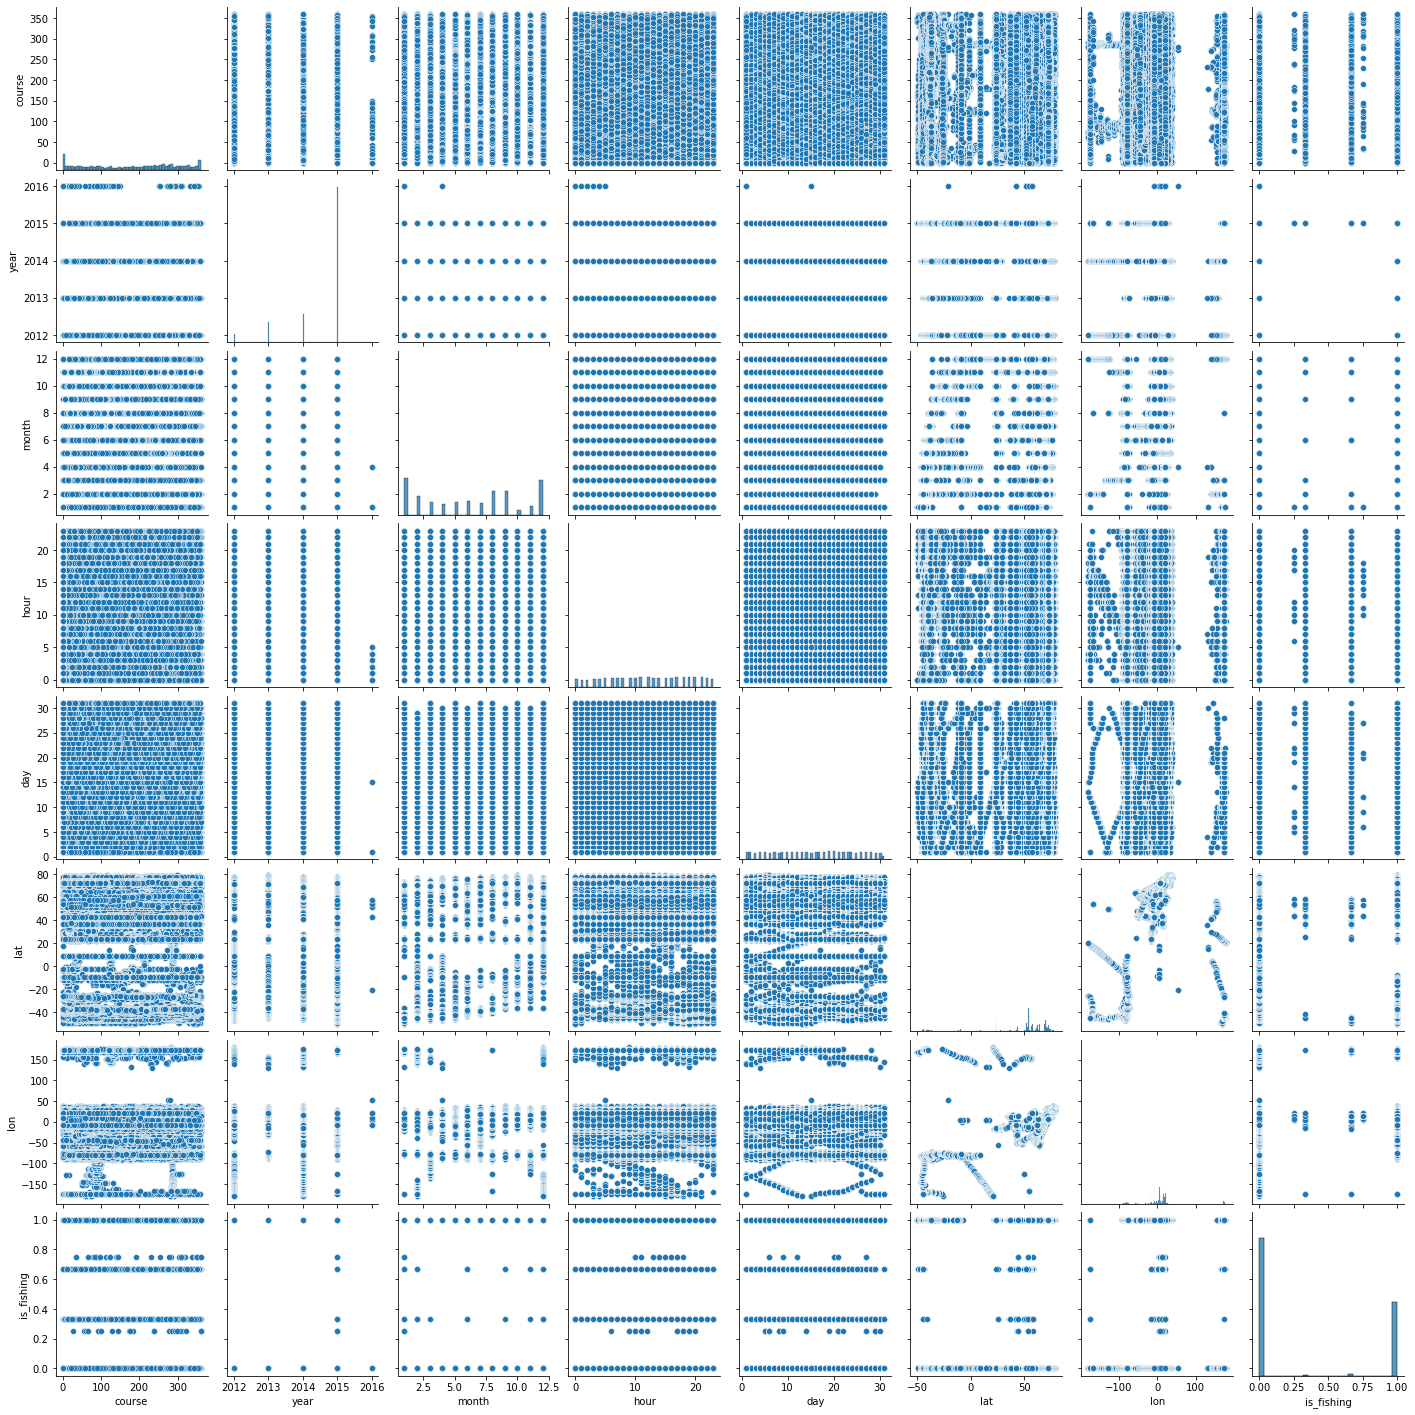

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 2]
g = sns.pairplot(fishing_location, vars=["course","year","month","hour","day","lat","lon","is_fishing"])

In [108]:
import plotly.express as px


fishing_location["mmsi"] = fishing_location["mmsi"].astype(str)
fig = px.line_geo(fishing_vessels,lat='lat',lon='lon', color = "mmsi", hover_name="datetime",projection ="azimuthal equal area")#, \
#animation_frame = fishing_location["datetime"][:500].astype(str))
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()
fishing_location["mmsi"] = fishing_location["mmsi"].astype(float)

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils


features = ["mmsi","timestamp","distance_from_port","speed","course","lat","lon","month","hour","day"]
target = ["is_fishing"]

X = fishing_vessels[features]
y = fishing_vessels[target]

# lab = preprocessing.LabelEncoder()
# y_transformed = lab.fit_transform(y)

#X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf=RandomForestRegressor(n_estimators=70,verbose=3,max_depth=30,min_samples_split=2,n_jobs=-1)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


C:\Users\ARUL RAYMONDS\AppData\Local\Temp\ipykernel_10932\738053603.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 70building tree 2 of 70building tree 3 of 70
building tree 4 of 70

building tree 5 of 70
building tree 6 of 70building tree 7 of 70

building tree 8 of 70

building tree 9 of 70
building tree 10 of 70
building tree 11 of 70
building tree 12 of 70
building tree 13 of 70building tree 14 of 70

building tree 15 of 70
building tree 16 of 70
building tree 17 of 70
building tree 18 of 70
building tree 19 of 70
building tree 20 of 70
building tree 21 of 70
building tree 22 of 70
building tree 23 of 70
building tree 24 of 70


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.5s


building tree 25 of 70
building tree 26 of 70
building tree 27 of 70
building tree 28 of 70
building tree 29 of 70
building tree 30 of 70
building tree 31 of 70
building tree 32 of 70
building tree 33 of 70
building tree 34 of 70
building tree 35 of 70
building tree 36 of 70
building tree 37 of 70
building tree 38 of 70
building tree 39 of 70
building tree 40 of 70
building tree 41 of 70
building tree 42 of 70building tree 43 of 70

building tree 44 of 70
building tree 45 of 70
building tree 46 of 70
building tree 47 of 70building tree 48 of 70

building tree 49 of 70
building tree 50 of 70
building tree 51 of 70building tree 52 of 70

building tree 53 of 70
building tree 54 of 70
building tree 55 of 70
building tree 56 of 70
building tree 57 of 70
building tree 58 of 70
building tree 59 of 70
building tree 60 of 70
building tree 61 of 70
building tree 62 of 70
building tree 63 of 70
building tree 64 of 70
building tree 65 of 70
building tree 66 of 70
building tree 67 of 70
building tr

[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   10.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  70 out of  70 | elapsed:    0.0s finished


In [280]:
clf.score(X_test, y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  70 out of  70 | elapsed:    0.0s finished


0.9284368428754692

In [213]:

feature_imp = pd.Series(clf.feature_importances_,\
                        index=features).sort_values(ascending=False)
feature_imp

speed                0.6073
lat                  0.0889
lon                  0.0706
timestamp            0.0679
distance_from_port   0.0656
course               0.0319
day                  0.0251
hour                 0.0247
month                0.0180
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


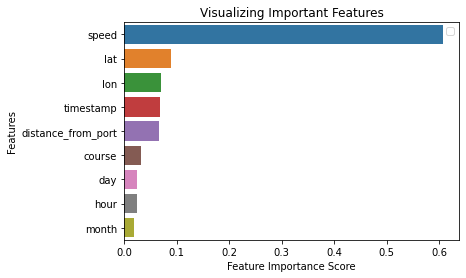

In [214]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [277]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

features = ["mmsi","timestamp","distance_from_port","speed","course","lat","lon","month","hour","day"]
target = ["is_fishing"]

X = fishing_vessels[features]
y = fishing_vessels[target]

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
knn_model = KNeighborsRegressor(n_neighbors=2,n_jobs=-1)
knn_model.fit(X_train, y_train)
train_preds = knn_model.predict(X_test)


D:\install\condamini\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [278]:
knn_model.score(X_test,y_test)

0.9480620365007157

In [269]:
y_train.shape

(131490,)

In [270]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, train_preds)
rmse = sqrt(mse)
rmse

0.5314809978790851

In [271]:
print("Accuracy:",metrics.accuracy_score(y_test, train_preds))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [282]:
import pickle
filename = 'finalized_knn_model.sav'
pickle.dump(knn_model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9782702987512293


## 6. Evaluation <a class="anchor" id="sixth-bullet"></a>

code blocks...

## 7. Deployments <a class="anchor" id="seventh-bullet"></a>

code blocks...

## 8. Discussion <a class="anchor" id="eighth-bullet"></a>

code blocks...

## 9. Result <a class="anchor" id="nineth-bullet"></a>

code blocks...

## 9. References <a class="anchor" id="tenth-bullet"></a>

code blocks...